In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=100, noise=0.05, random_state=1)

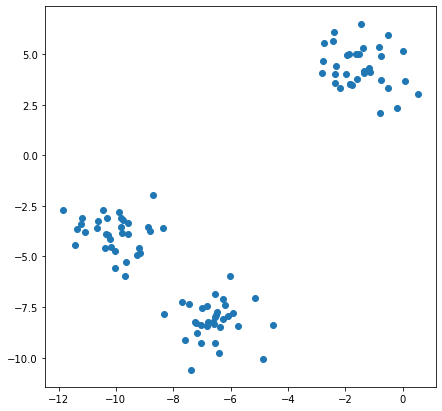

In [2]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [3]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

### Для подсчета среднеквадратического внутрикластерного расстояния применил функцию для подсчета дисперсии, так как центроида не что иное как матожидание в конкретном кластере.

In [23]:
def var_claster(clusters):
    avin_distance = np.sum([np.var(clusters[cluster], axis=0) for cluster in clusters])
    return avin_distance

In [4]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [18]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y', 'c', 'm', 'k', 'gold', 'peru']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [34]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

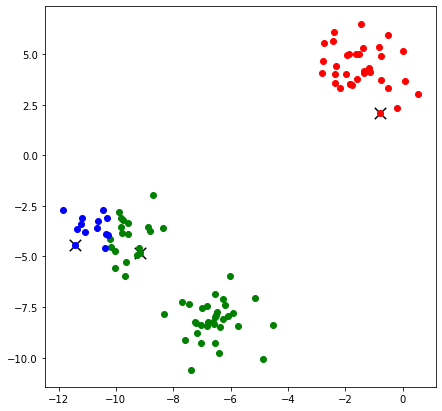

Wall time: 1.97 s


In [13]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

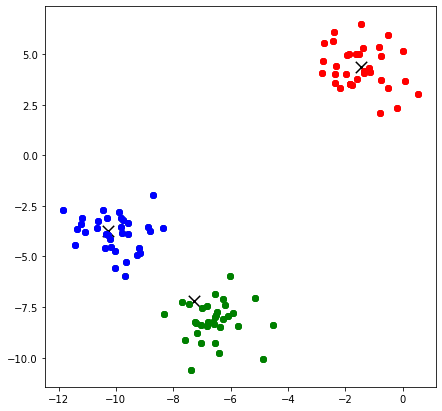

Wall time: 4.86 s


In [14]:
%%time
max_iterations = 3

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

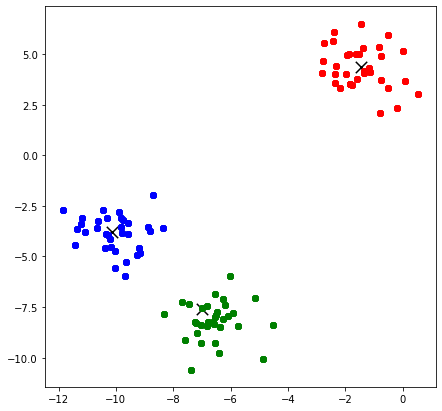

Wall time: 8.18 s


In [15]:
%%time
max_iterations = 5

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

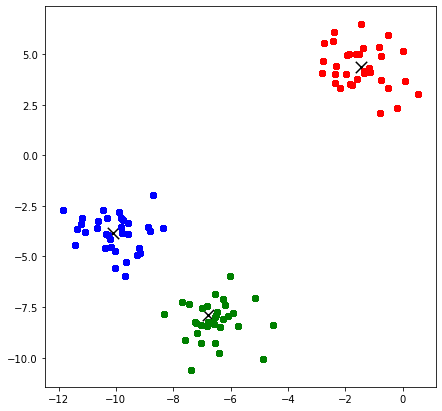

Wall time: 16 s


In [35]:
%%time
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [36]:
print(f'При k=3 среднеквадратическое внутрикластерное расстояние = {var_claster(clusters):0.4f}')

При k=3 среднеквадратическое внутрикластерное расстояние = 6.0538


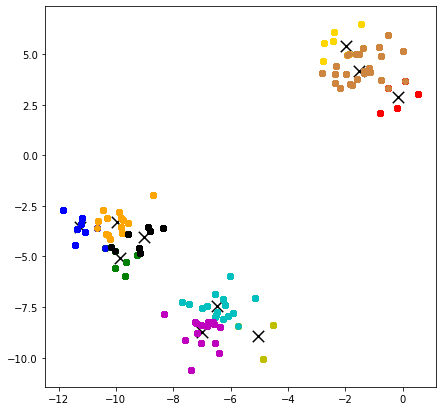

Wall time: 25.2 s


In [21]:
%%time
max_iterations = 15
k = 10
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [24]:
k_list =[]
av_in_distance = []

for i in range(1, 11, 1):
    k_list.append(i)
    centroids, clusters = kmeans(X, i, max_iterations, min_distance)
    av_in_distance.append(var_claster(clusters))

Text(0, 0.5, 'Rms intracluster distance')

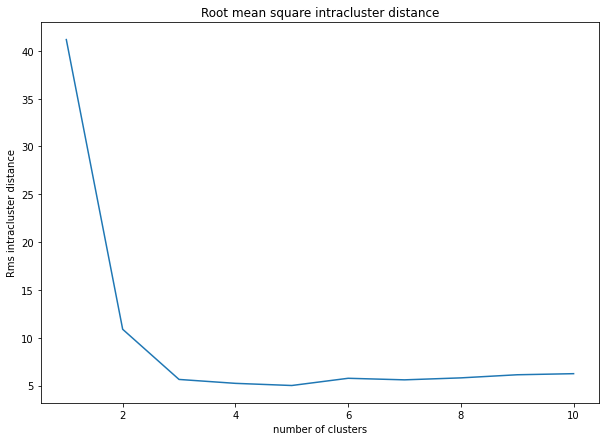

In [28]:
# Визуализируем изменение среднеквадратического расстояния от кол-ва кластеров
plt.figure(figsize=(10, 7))
plt.plot(k_list, av_in_distance)
plt.title('Root mean square intracluster distance')
plt.xlabel('number of clusters')
plt.ylabel('Rms intracluster distance')

#### Увеличение кол-ва кластеров на начальном этапе резко снижает среднеквадратическое внутрикластерное расстояние (k <=4), с увеличением (k>5) качество этой метрики немного ухудшается. Оптимальным количеством кластеров по этой метрике будет k=3, k=4 или k=5.

In [29]:
k_list =[]
av_in_distance = []

for i in range(1, 6, 1):
    k_list.append(i)
    centroids, clusters = kmeans(X, i, max_iterations, min_distance)
    av_in_distance.append(var_claster(clusters))

Text(0, 0.5, 'Rms intracluster distance')

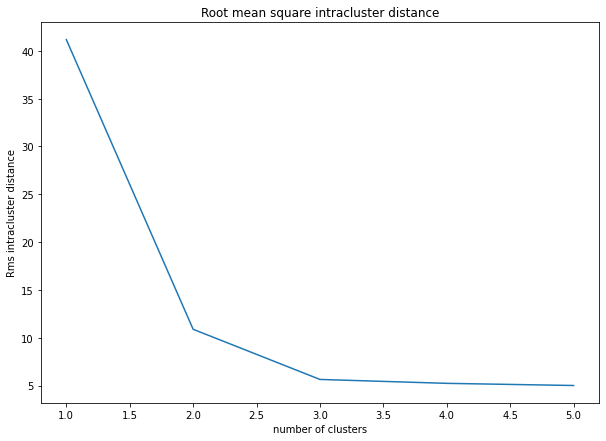

In [30]:
# Визуализируем изменение среднеквадратического расстояния от кол-ва кластеров
plt.figure(figsize=(10, 7))
plt.plot(k_list, av_in_distance)
plt.title('Root mean square intracluster distance')
plt.xlabel('number of clusters')
plt.ylabel('Rms intracluster distance')

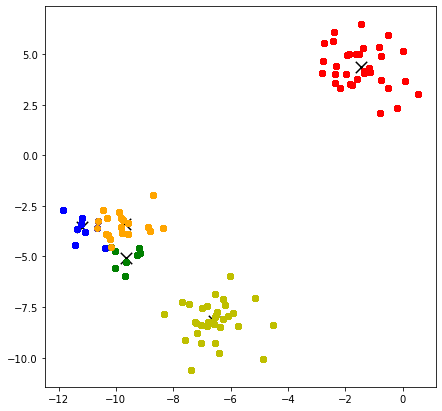

In [31]:
visualize(centroids, clusters)

In [33]:
print(f'При k=5 среднеквадратическое внутрикластерное расстояние = {var_claster(clusters):0.4f}')

При k=5 среднеквадратическое внутрикластерное расстояние = 5.0011
